<a href="https://colab.research.google.com/github/rikachan19/deeplearning/blob/main/tugas3/Multilabel_image_classification_tugas3_randomthings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
import keras
from keras.applications import MobileNetV2
from keras.models import Model
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
import os
os.environ["KAGGLE_USERNAME"] = "samprul"
os.environ["KAGGLE_KEY"] = "b40788d8a48fec1c8e173749fafa9116"

In [4]:
!kaggle datasets download -d samprul/dataset-multilabel-random-things

Dataset URL: https://www.kaggle.com/datasets/samprul/dataset-multilabel-random-things
License(s): apache-2.0


In [5]:
!unzip dataset-multilabel-random-things.zip

Archive:  dataset-multilabel-random-things.zip
  inflating: DatasetMultilabe_MuhammadRifkiRaihan_202255202095/Gambar001.jpg  
  inflating: DatasetMultilabe_MuhammadRifkiRaihan_202255202095/Gambar002.jpg  
  inflating: DatasetMultilabe_MuhammadRifkiRaihan_202255202095/Gambar003.jpg  
  inflating: DatasetMultilabe_MuhammadRifkiRaihan_202255202095/Gambar004.jpg  
  inflating: DatasetMultilabe_MuhammadRifkiRaihan_202255202095/Gambar005.jpg  
  inflating: DatasetMultilabe_MuhammadRifkiRaihan_202255202095/Gambar006.jpg  
  inflating: DatasetMultilabe_MuhammadRifkiRaihan_202255202095/Gambar007.jpg  
  inflating: DatasetMultilabe_MuhammadRifkiRaihan_202255202095/Gambar008.jpg  
  inflating: DatasetMultilabe_MuhammadRifkiRaihan_202255202095/Gambar009.jpg  
  inflating: DatasetMultilabe_MuhammadRifkiRaihan_202255202095/Gambar010.jpg  
  inflating: DatasetMultilabe_MuhammadRifkiRaihan_202255202095/Gambar011.jpg  
  inflating: DatasetMultilabe_MuhammadRifkiRaihan_202255202095/Gambar012.jpg  
  inf

In [6]:
df = pd.read_csv('/content/traindataset_MuhammadRifkiRaihan_202255202095.csv', delimiter=';')

display(df.head())

,id,object,comic,photocard,knife,boardmarker
0,Gambar001,"['comic', 'photocard', 'knife', 'boardmarker']",1,1,1,1
1,Gambar002,"['comic', 'photocard', 'knife', 'boardmarker']",1,1,1,1
2,Gambar003,"['comic', 'photocard', 'knife', 'boardmarker']",1,1,1,1
3,Gambar004,"['comic', 'photocard', 'knife', 'boardmarker']",1,1,1,1
4,Gambar005,"['comic', 'photocard', 'knife', 'boardmarker']",1,1,1,1


In [7]:
SIZE = 224
X_dataset = []

image_directory = '/content/DatasetMultilabe_MuhammadRifkiRaihan_202255202095'
for i in tqdm(range(df.shape[0])):

    img = image.load_img(image_directory + '/' + df['id'][i]+'.jpg', target_size=(SIZE,SIZE,3))
    img = image.img_to_array(img)
    img = img/255.
    X_dataset.append(img)

X = np.array(X_dataset)

100%|██████████| 300/300 [00:37<00:00,  8.00it/s]


In [8]:
print(df['id'][250])


Gambar251


In [9]:
print(df['object'][250])

['comic', 'photocard', 'boardmarker']


In [10]:
y = np.array(df.drop(['id', 'object'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)

In [11]:
SIZE = 224

base_model = MobileNetV2(input_shape=(SIZE, SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,430,468 (9.27 MB)

 Trainable params: 172,484 (673.77 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [12]:
from tensorflow.keras.metrics import AUC

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[AUC(name='auc')])

In [13]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - auc: 0.5021 - loss: 0.8072 - val_auc: 0.7875 - val_loss: 0.4583
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - auc: 0.6369 - loss: 0.5833 - val_auc: 0.8932 - val_loss: 0.4215
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - auc: 0.7304 - loss: 0.5251 - val_auc: 0.9410 - val_loss: 0.3798
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - auc: 0.7754 - loss: 0.4800 - val_auc: 0.9196 - val_loss: 0.3753
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - auc: 0.7550 - loss: 0.4918 - val_auc: 0.9352 - val_loss: 0.3545
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - auc: 0.8274 - loss: 0.4194 - val_auc: 0.9366 - val_loss: 0.3374
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - auc: 0.8413 - loss: 0.4090 - val_auc: 0.9629 - val_loss: 0.3098
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - auc: 0.8902 - loss: 0.3604 - val_auc: 0.9631 - val_loss: 0.2964
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - auc: 0.9004 - loss: 0.3356 - val_auc: 

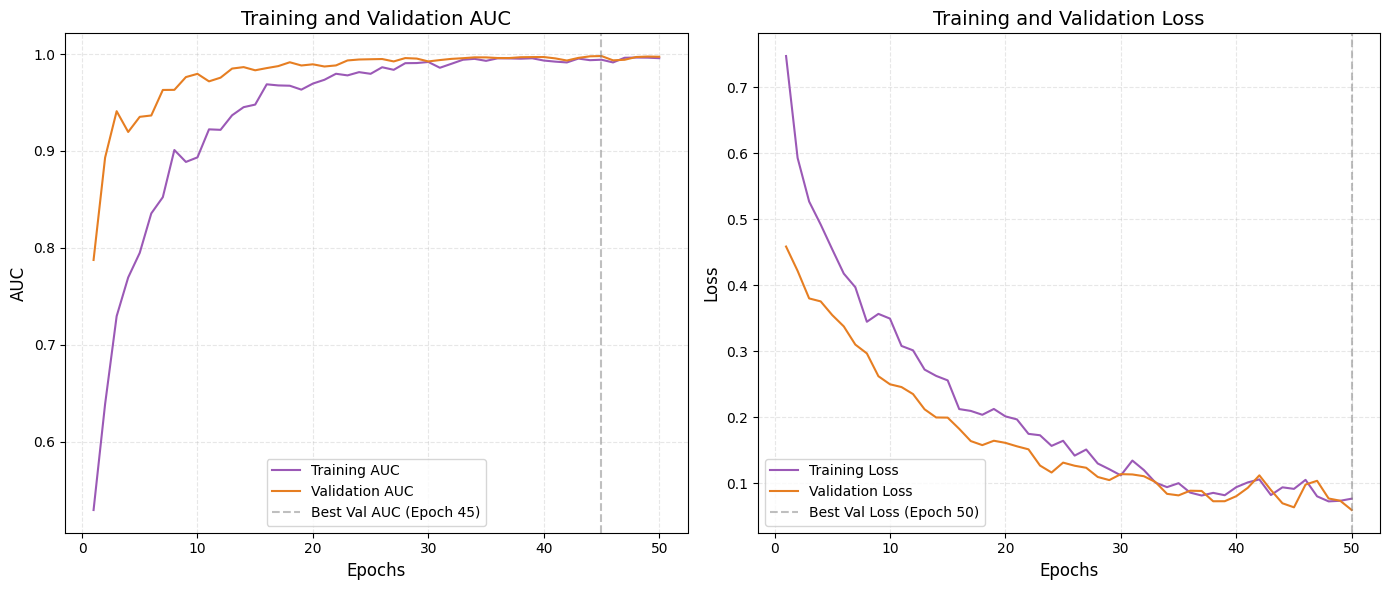

In [22]:
auc = history.history['auc']
val_auc = history.history['val_auc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(auc) + 1)

best_val_auc_epoch = np.argmax(val_auc) + 1
best_val_loss_epoch = np.argmin(val_loss) + 1

plt.figure(figsize=(14, 6))

# Plot AUC
plt.subplot(1, 2, 1)
plt.plot(epochs, auc, color='#9b59b6', label='Training AUC')  # Ungu
plt.plot(epochs, val_auc, color='#e67e22', label='Validation AUC')  # Jingga
plt.axvline(best_val_auc_epoch, color='gray', linestyle='--', alpha=0.5,
            label=f'Best Val AUC (Epoch {best_val_auc_epoch})')
plt.title('Training and Validation AUC', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('AUC', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, color='#9b59b6', label='Training Loss')  # Ungu
plt.plot(epochs, val_loss, color='#e67e22', label='Validation Loss')  # Jingga
plt.axvline(best_val_loss_epoch, color='gray', linestyle='--', alpha=0.5,
            label=f'Best Val Loss (Epoch {best_val_loss_epoch})')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


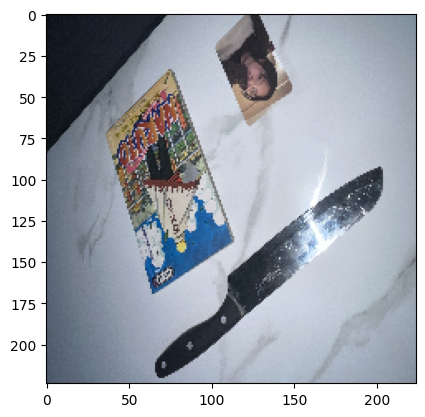

In [16]:

img = image.load_img('/content/DatasetMultilabe_MuhammadRifkiRaihan_202255202095/Gambar205.jpg', target_size=(SIZE,SIZE,3))

img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(df.columns[2:])
proba = model.predict(img)
sorted_categories = np.argsort(proba[0])[:-11:-1]

In [17]:
for i in range(4):
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))

knife (0.999)
comic (0.994)
photocard (0.987)
boardmarker (0.00572)


In [18]:
###################################################

loss, auc = model.evaluate(X_test, y_test)
print("AUC = ", (auc * 100.0), "%")

###################################################

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - auc: 0.9977 - loss: 0.0571
AUC =  99.72179532051086 %


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step
              precision    recall  f1-score   support

       comic       1.00      1.00      1.00        68
   photocard       0.96      0.97      0.97        76
       knife       0.98      1.00      0.99        64
 boardmarker       0.99      1.00      0.99        68

   micro avg       0.98      0.99      0.99       276
   macro avg       0.98      0.99      0.99       276
weighted avg       0.98      0.99      0.99       276
 samples avg       0.98      0.99      0.98       276



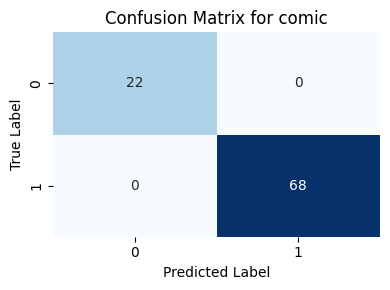

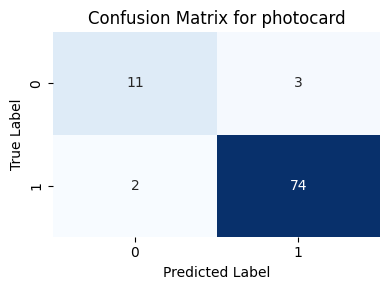

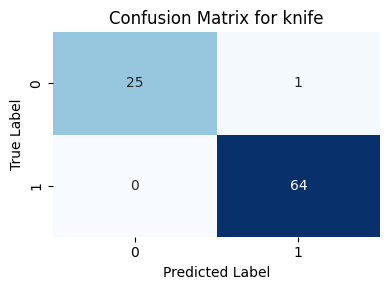

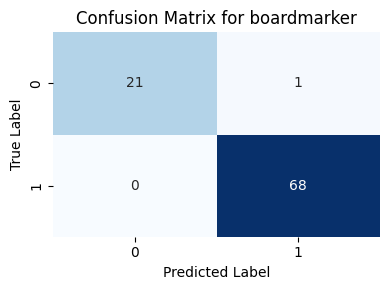

In [19]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred_classes, target_names=classes))

for i in range(len(classes)):
    cm = confusion_matrix(y_test[:, i], y_pred_classes[:, i])

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {classes[i]}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()
